# Housing Price Prediction

In [5]:
'''
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
'''

"\nimport os\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n"

# import Libraries

In [6]:
#import dataset with pandas
import pandas as pd
# visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
warnings.filterwarnings("ignore")

# section 1: Exploratory Data Analysis

Train and Test dataframes

In [7]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
# size of dataset:

print("Dataset has {0} Rows(size)  and {1} Columns(features)".format(train_df.shape[0],train_df.shape[1]))

Dataset has 1460 Rows(size)  and 81 Columns(features)


In [9]:
#datset information
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
# Numecial and Categorical variables
numeric_cols = train_df.select_dtypes(include = ['int64','float64'])
categorical_cols =  train_df.select_dtypes(include = ['object'])

In [11]:
print("N.O. of numeric columns: {0}".format(numeric_cols.shape[1]))
numeric_cols.columns

N.O. of numeric columns: 38


Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [12]:
print("N.O. of categorical columns: {0}".format(categorical_cols.shape[1]))
categorical_cols.columns

N.O. of categorical columns: 43


Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

# Correlation with numeric values

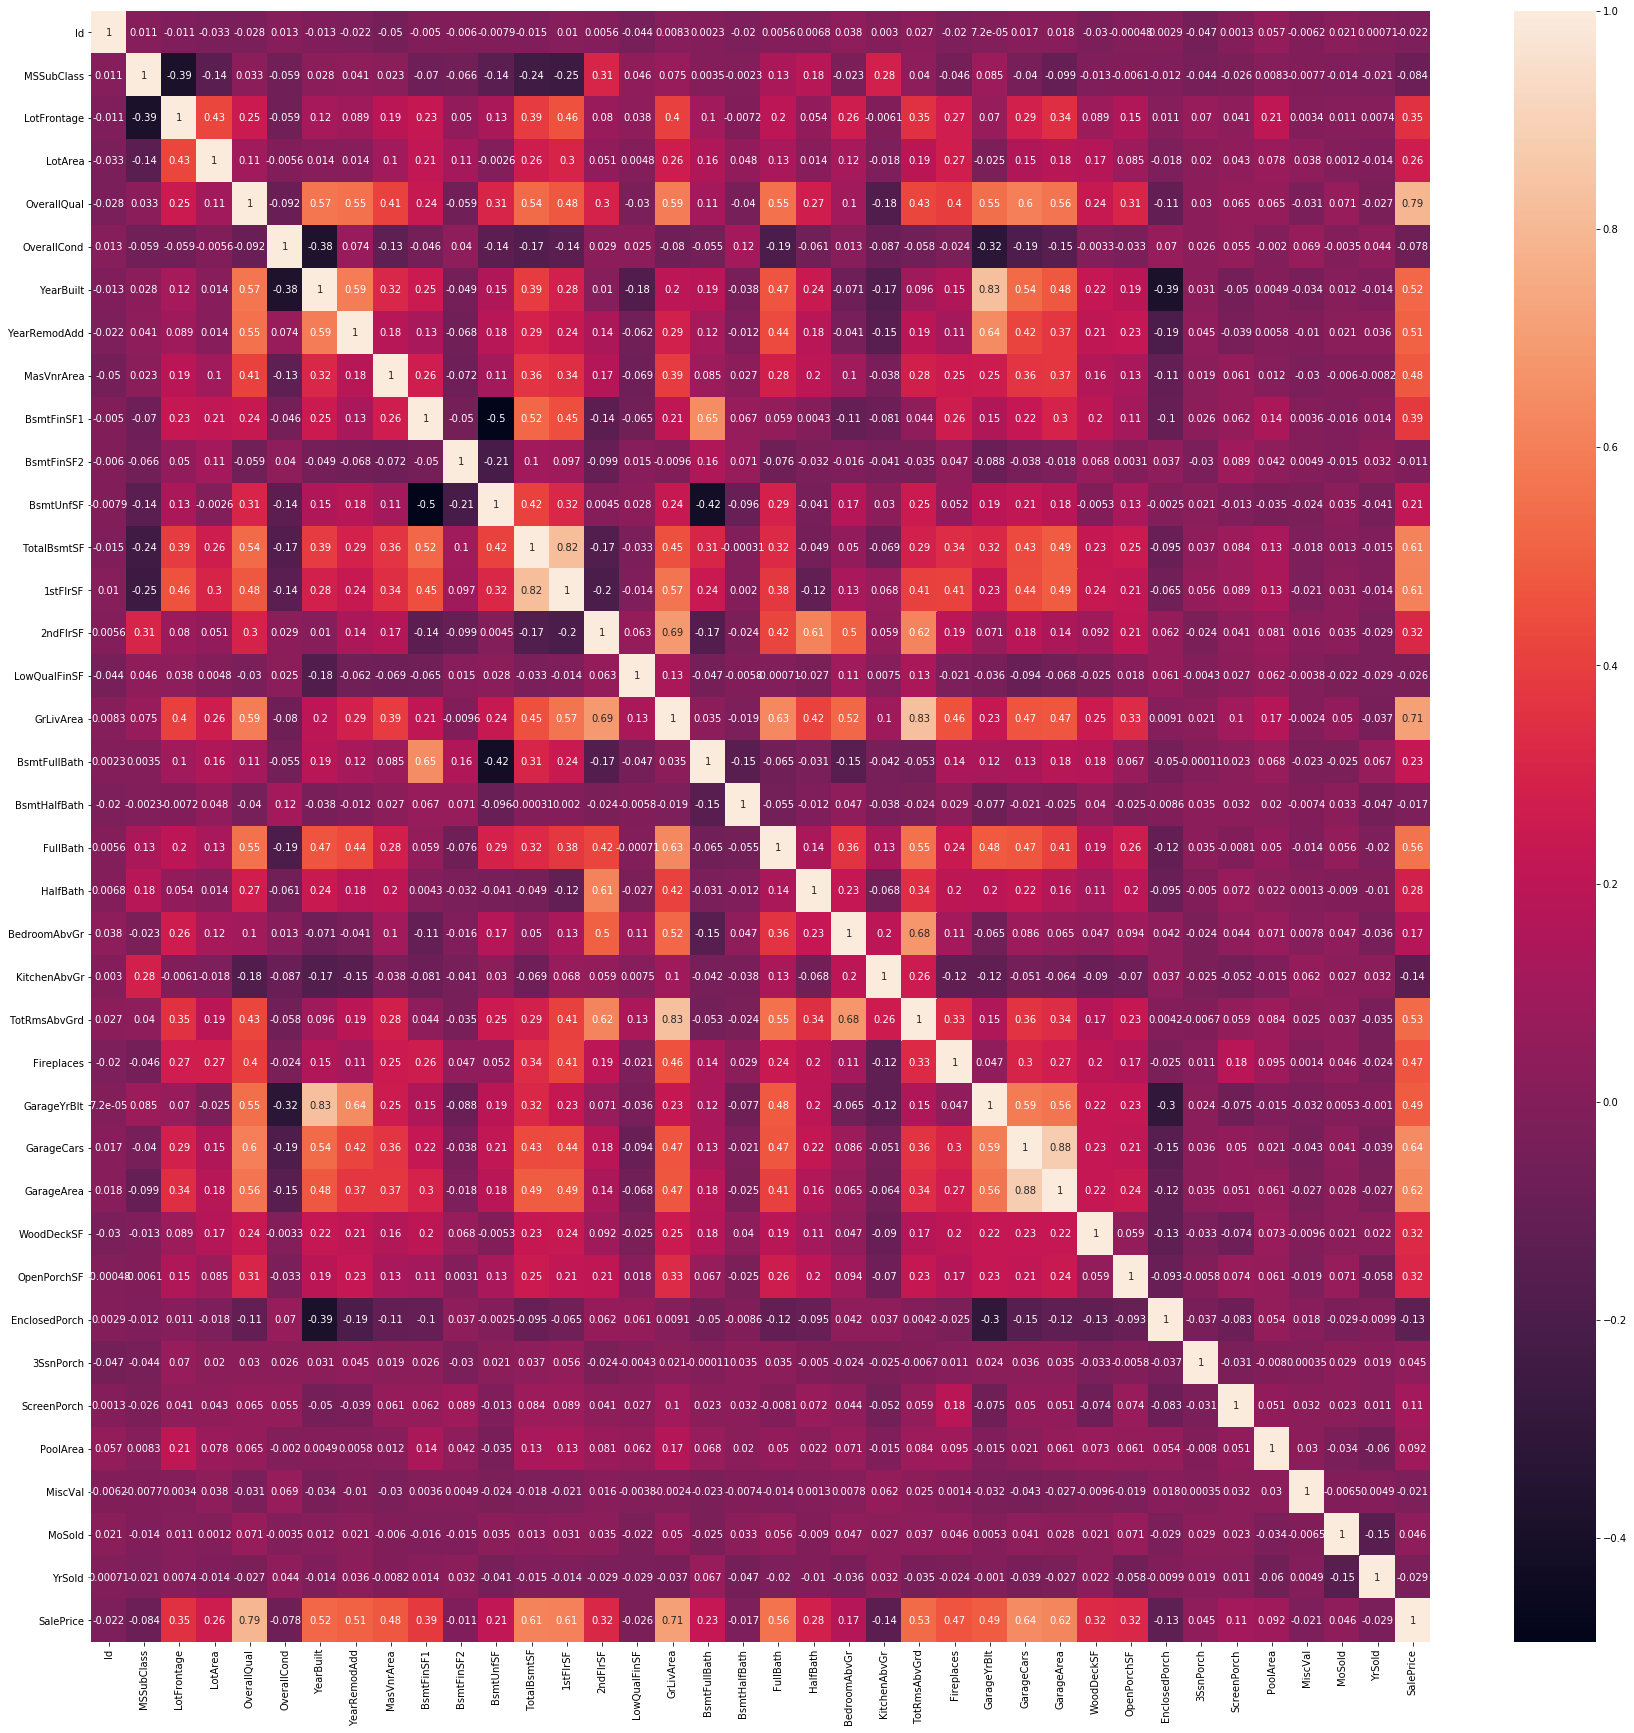

In [13]:
plt.figure(figsize=(30,30))
sns.heatmap(numeric_cols.corr(),annot=True)
plt.show()

### Missing Values

In [14]:
null_cols = [f for f in train_df.columns if train_df[f].isnull().sum()/len(train_df) >0]
null_cols_to_drop = [f for f in train_df.columns if train_df[f].isnull().sum()/len(train_df) > 0.75]
print(null_cols_to_drop)

['Alley', 'PoolQC', 'Fence', 'MiscFeature']


### droping values with 75 % null values

In [15]:
#test and train df dropping columns
train_df = train_df.drop(null_cols_to_drop,axis=1)
test_df = test_df.drop(null_cols_to_drop,axis=1)

In [16]:
for n in null_cols:
    if n not in null_cols_to_drop:
        print(n,(train_df[n].isnull().sum()/len(train_df))*100,'%')

LotFrontage 17.73972602739726 %
MasVnrType 0.547945205479452 %
MasVnrArea 0.547945205479452 %
BsmtQual 2.5342465753424657 %
BsmtCond 2.5342465753424657 %
BsmtExposure 2.6027397260273974 %
BsmtFinType1 2.5342465753424657 %
BsmtFinType2 2.6027397260273974 %
Electrical 0.0684931506849315 %
FireplaceQu 47.26027397260274 %
GarageType 5.5479452054794525 %
GarageYrBlt 5.5479452054794525 %
GarageFinish 5.5479452054794525 %
GarageQual 5.5479452054794525 %
GarageCond 5.5479452054794525 %


In [17]:
#updating numeric and categorical columns
num_cols = [i for i in numeric_cols.columns if i not in null_cols_to_drop]
cat_cols = [i for i in categorical_cols.columns if i not in null_cols_to_drop]


### Temporal variables


In [18]:
year_cols = [f for f in num_cols if 'Yr' in f or 'Year' in f]
year_cols

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

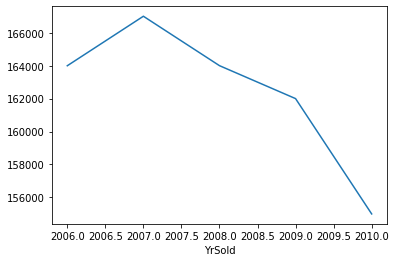

In [19]:
numeric_cols.groupby('YrSold')['SalePrice'].median().plot()
plt.show()

 un-usuall vaule of sale price drop for recent years

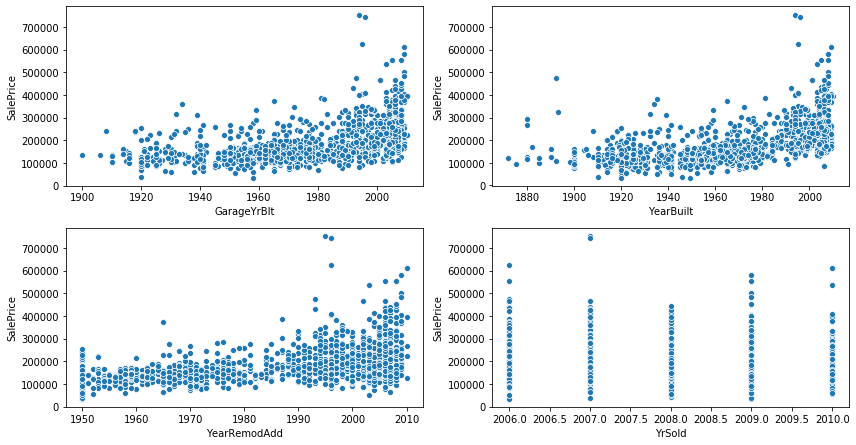

In [20]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold']):
    plt.subplot(4, 2, i+1)
    sns.scatterplot(train_df[feature], train_df['SalePrice'])
    plt.tight_layout()

# Numerical values is further classified as discrete and continouse

In [21]:
# Discrete Features
des_num = [ f for f in num_cols if len(numeric_cols[f].unique())<25]
des_num

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

### Discrete values vs SalePrice

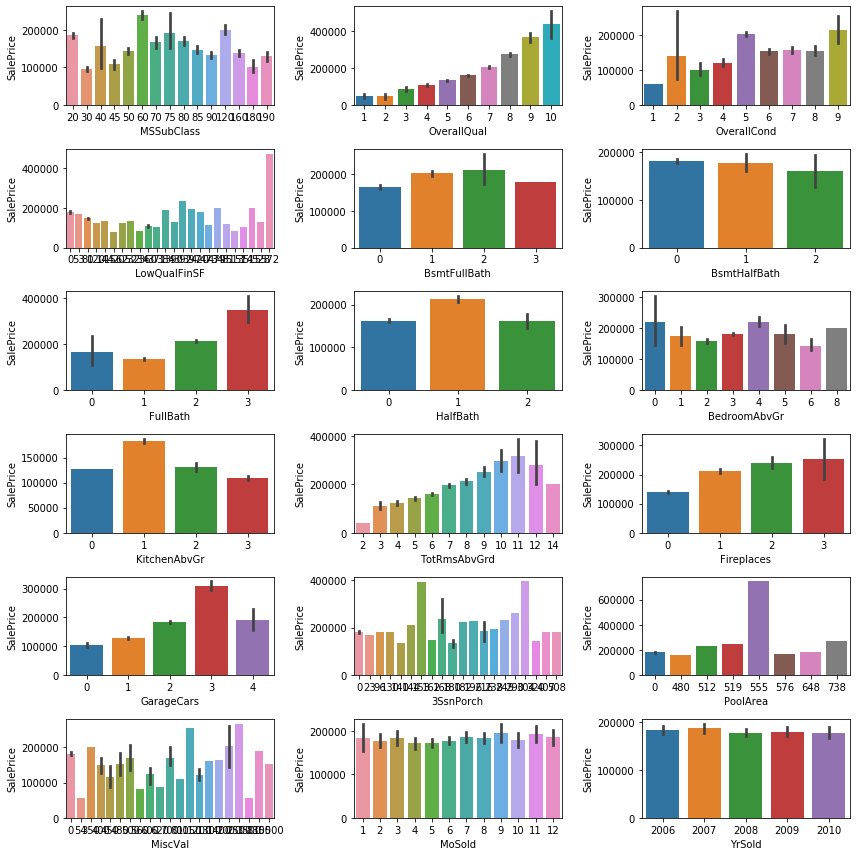

In [22]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(des_num):
    plt.subplot(6, 3, i+1)
    sns.barplot(train_df[feature], train_df['SalePrice'])
    plt.tight_layout()

In [23]:
#continouse variable
con_num = [f for f in num_cols if f not in des_num+['Id']+year_cols]
con_num

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

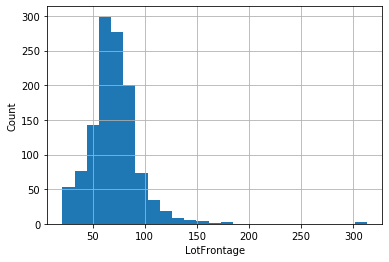

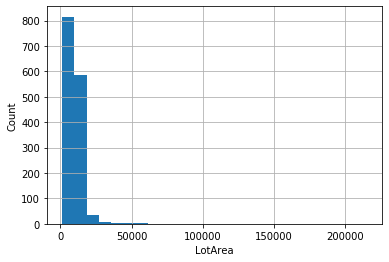

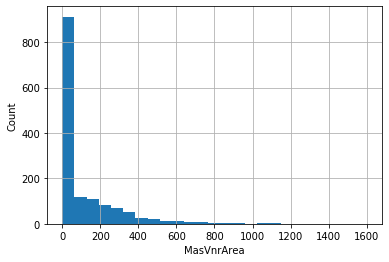

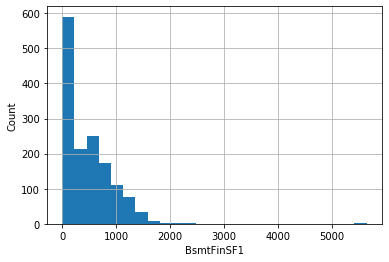

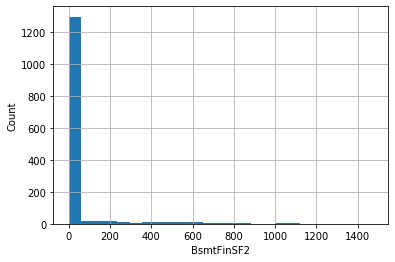

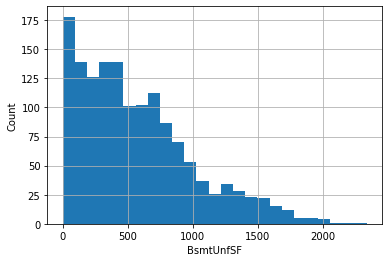

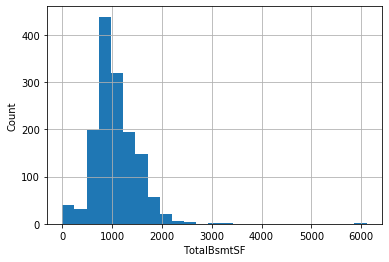

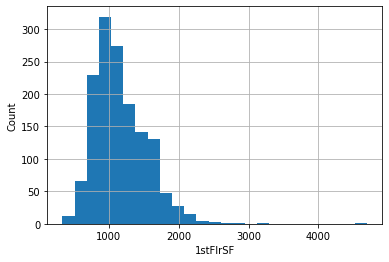

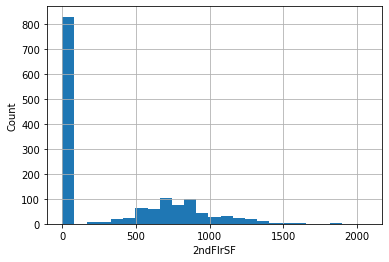

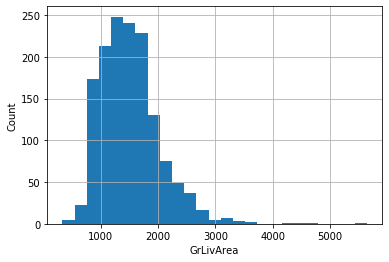

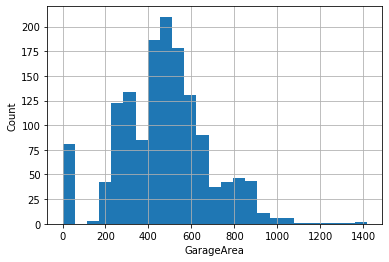

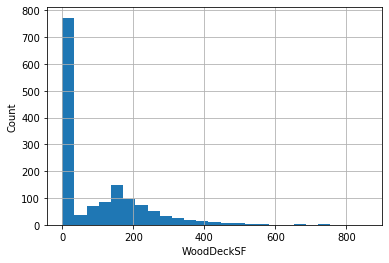

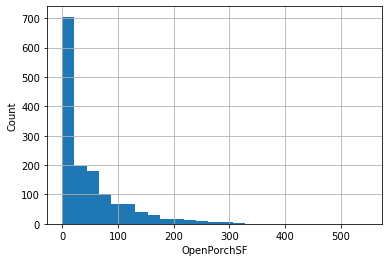

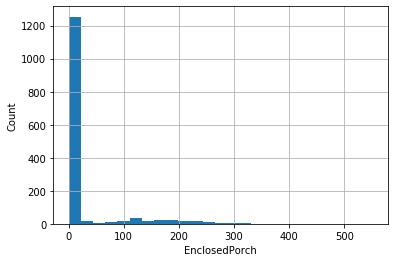

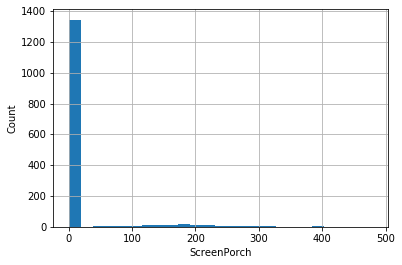

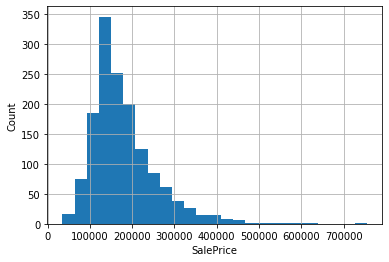

In [24]:
for i in con_num:
    train_df[i].hist(bins=25)
    plt.ylabel('Count')
    plt.xlabel(i)
    plt.show()

values doesnot have normal distribution curve lets use log transform on values to visualise the datapoints

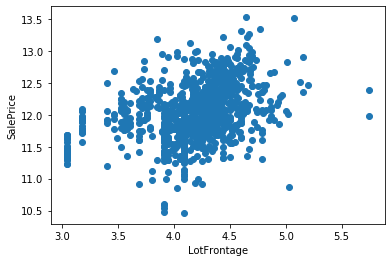

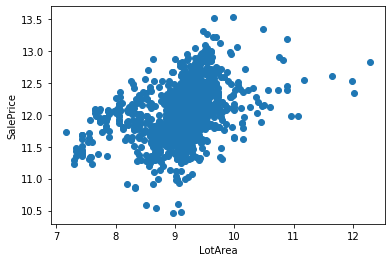

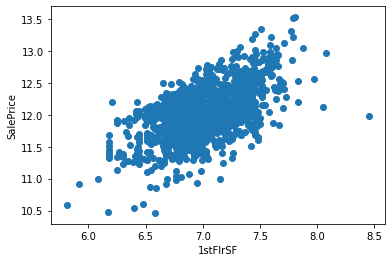

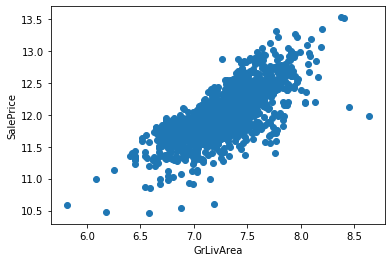

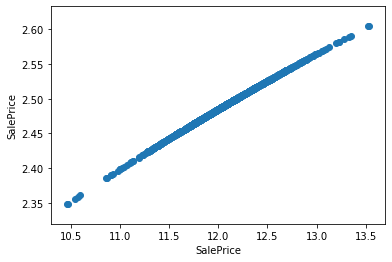

In [25]:
# log
data = train_df.copy()
for i in con_num:
    if 0 in data[i].unique():
        pass
    else:
        data[i]  = np.log(data[i])
        plt.scatter(data[i],np.log(data['SalePrice']))
        plt.xlabel(i)
        plt.ylabel('SalePrice')
        plt.show()

### Outlier values

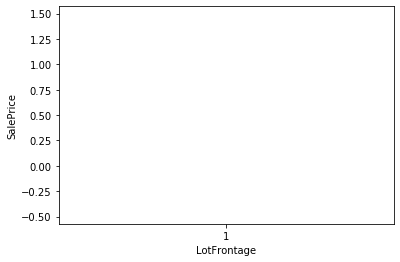

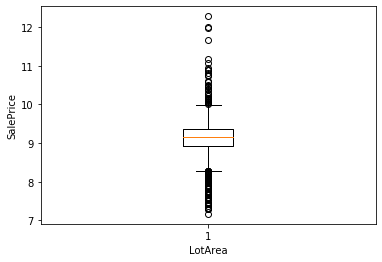

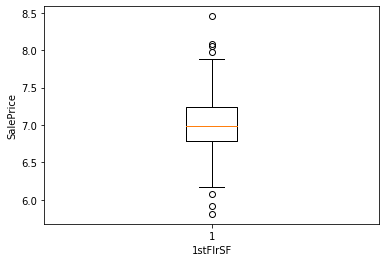

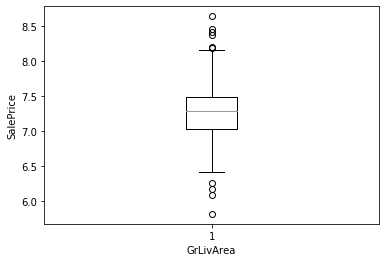

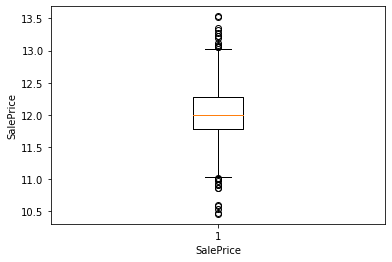

In [26]:
data = train_df.copy()
for i in con_num:
    if 0 in data[i].unique():
        pass
    else:
        data[i]  = np.log(data[i])
        plt.boxplot(data[i])
        plt.xlabel(i)
        plt.ylabel('SalePrice')
        plt.show()

## Categorical columns visualisation

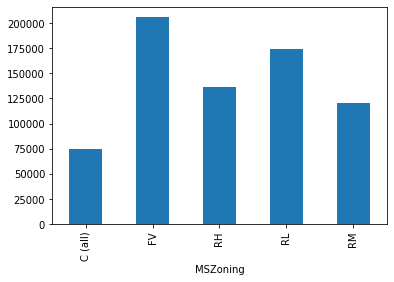

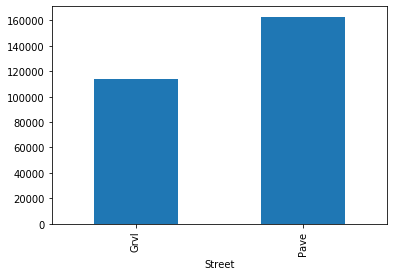

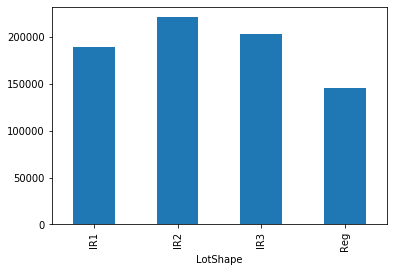

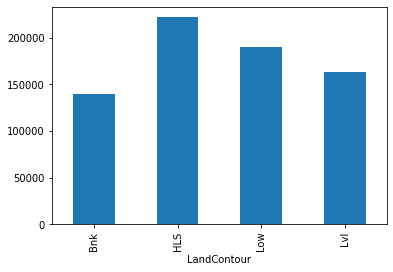

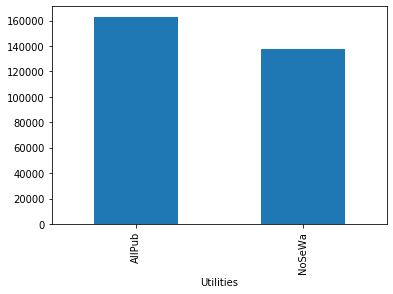

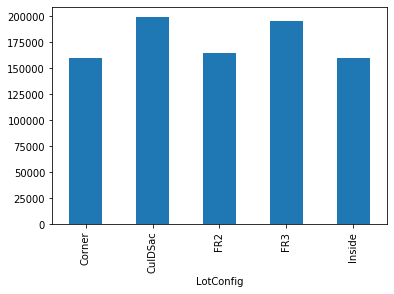

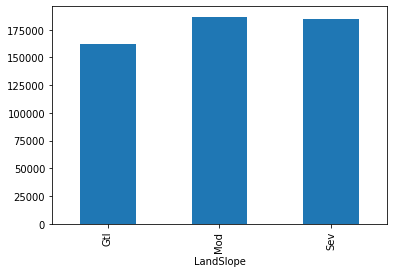

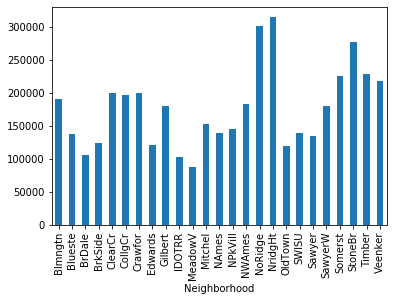

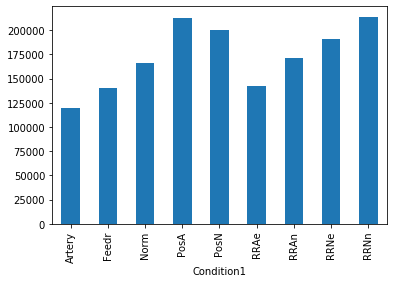

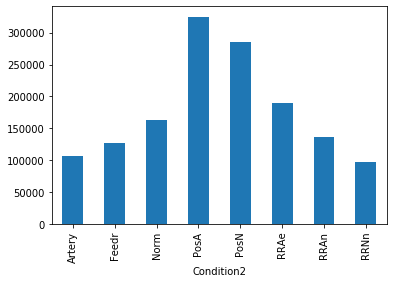

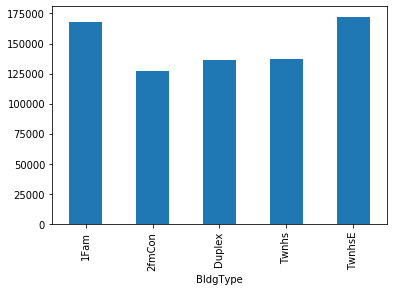

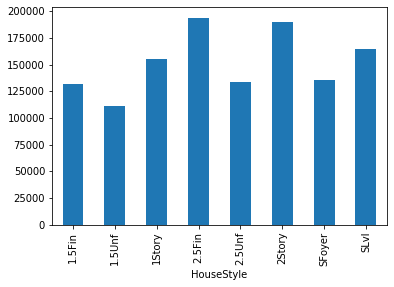

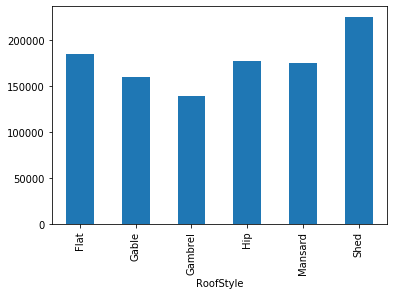

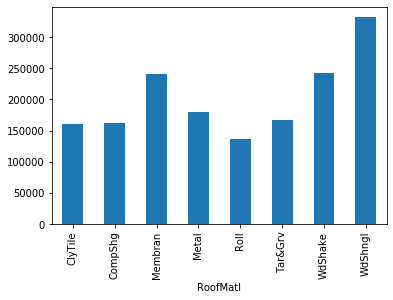

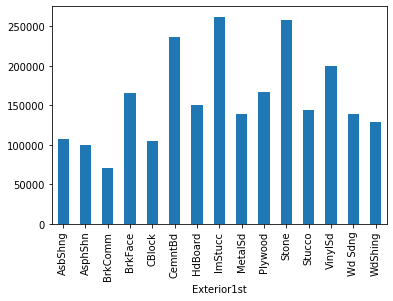

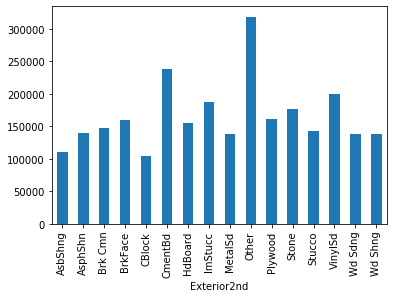

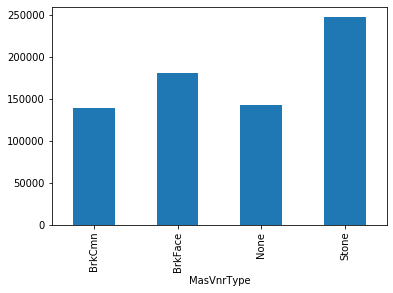

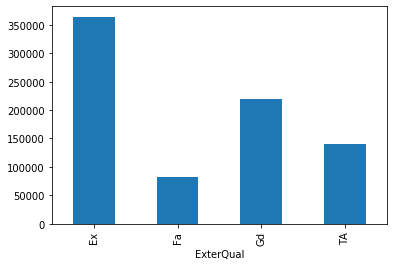

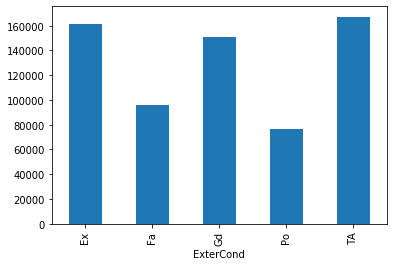

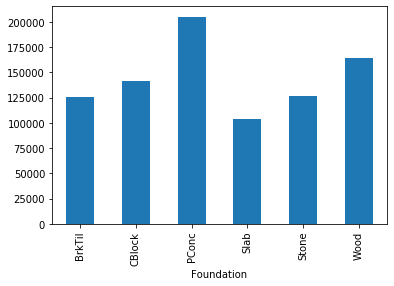

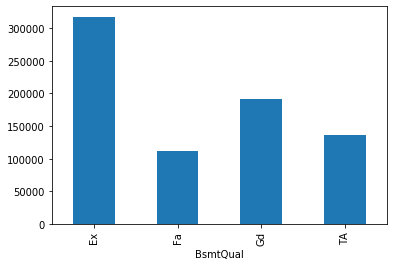

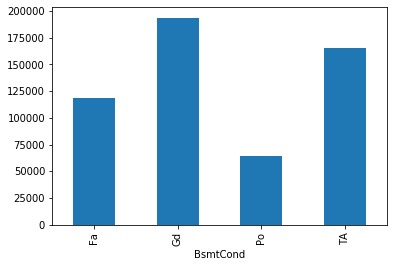

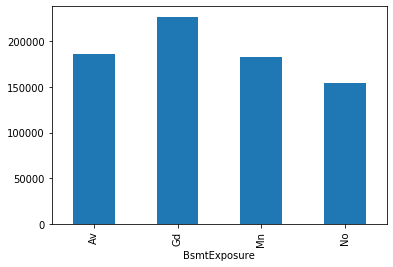

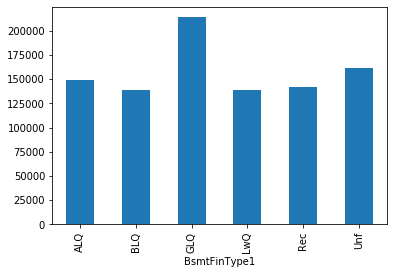

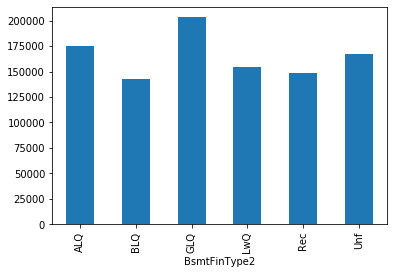

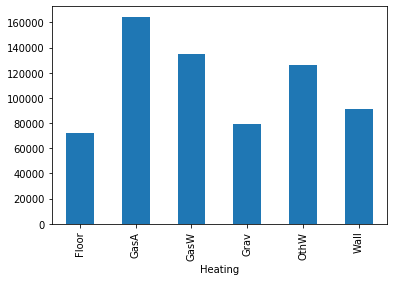

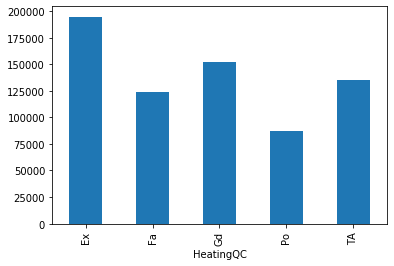

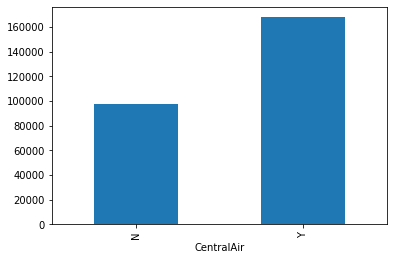

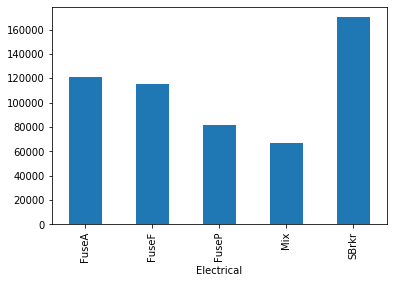

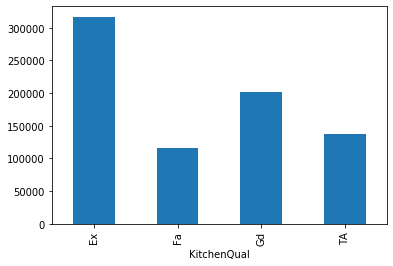

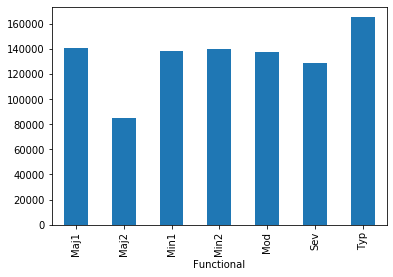

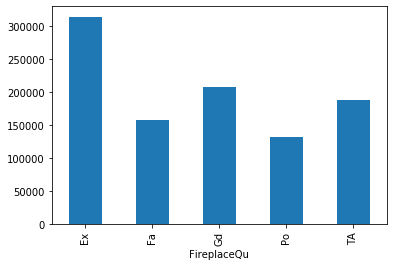

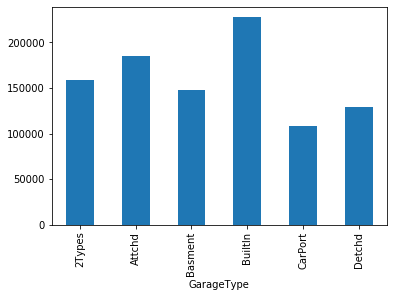

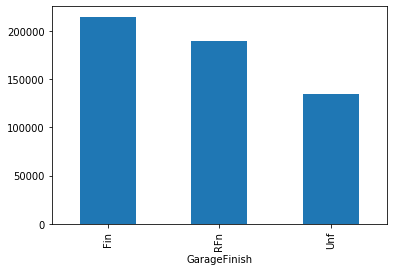

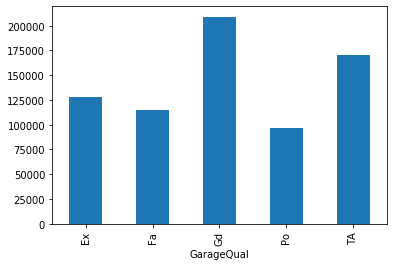

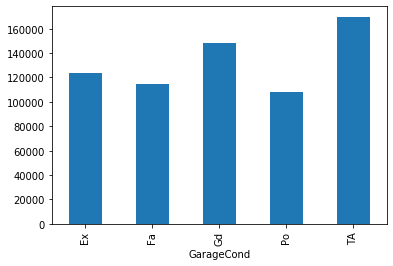

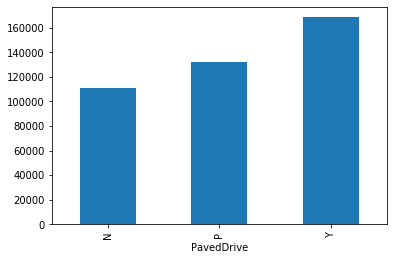

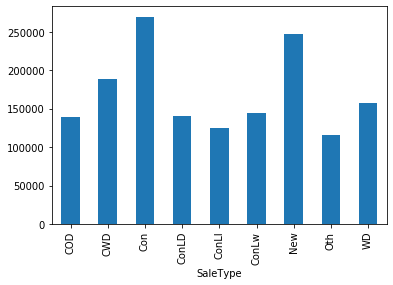

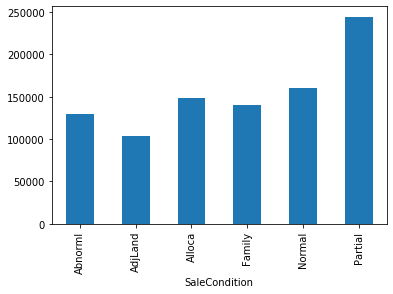

In [27]:
data = train_df.copy()
for i in cat_cols:
    data.groupby(i)['SalePrice'].median().plot(kind='bar')
    plt.show()

# Section 2 : Feature Engineering

### imputation

In [28]:
#impute  data wth missing for categorucal values
def cat_impute(data,categorical):
    data[categorical] =  data[categorical].fillna('missing')
    return data

In [29]:
# for numerical values impute with a flag column and median values
def num_impute(data,numeric):
    for i in numeric :
        if  i != 'SalePrice': 
            data[i+'_NAN'] = np.where(data[i].isnull(),1,0)
            m = data[i].median()
            data[i] = data[i].fillna(m)
    return data

In [30]:
# datatime temporal variables relat with year sold
def temp_impute(dataset):
    for i in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
        dataset[i] = dataset[i].fillna(0)
        dataset[i] = dataset['YrSold'] - dataset[i]
    
    return dataset


In [31]:
dataset  = train_df.copy()
dataset_test = test_df.copy()

In [32]:
dataset = temp_impute(dataset)
dataset[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']]

,YearBuilt,YearRemodAdd,GarageYrBlt
0,5,5,5.0
1,31,31,31.0
2,7,6,7.0
3,91,36,8.0
4,8,8,8.0
...,...,...,...
1455,8,7,8.0
1456,32,22,32.0
1457,69,4,69.0
1458,60,14,60.0


In [33]:
dataset_test = temp_impute(dataset_test)


Imputation of categorical and numerical values

In [34]:
num_cols = [x for x in num_cols if x not in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt','YrSold']]
dataset = num_impute(dataset,num_cols)
dataset_test = num_impute(dataset_test,num_cols)
cat_cols = [x for x in cat_cols if x not in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt','YrSold']]
dataset = cat_impute(dataset,cat_cols)
dataset_test = cat_impute(dataset_test,cat_cols)

In [35]:
dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,GarageCars_NAN,GarageArea_NAN,WoodDeckSF_NAN,OpenPorchSF_NAN,EnclosedPorch_NAN,3SsnPorch_NAN,ScreenPorch_NAN,PoolArea_NAN,MiscVal_NAN,MoSold_NAN
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,0,0,0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,0,0,0,0,0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,0,0,0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,0,0,0,0,0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,0,0,0
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,0,0,0
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,0,0,0
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,0,0,0


### Log Transformation withb respect th EDA on following variables this will help in fitting the normal distribution cure and model

In [36]:
#log normal distribution

log_cols = ['LotFrontage','LotArea','1stFlrSF','GrLivArea','SalePrice']

for f in dataset.columns:
    if f in log_cols:
        dataset[f] = np.log(dataset[f])
dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,GarageCars_NAN,GarageArea_NAN,WoodDeckSF_NAN,OpenPorchSF_NAN,EnclosedPorch_NAN,3SsnPorch_NAN,ScreenPorch_NAN,PoolArea_NAN,MiscVal_NAN,MoSold_NAN
0,1,60,RL,4.174387,9.041922,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,0,0,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,0,0,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,4.127134,8.976768,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,0,0,0
1456,1457,20,RL,4.442651,9.486076,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,0,0,0
1457,1458,70,RL,4.189655,9.109636,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,0,0,0
1458,1459,20,RL,4.219508,9.181632,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,0,0,0


In [37]:
#log normal distribution

log_cols_test = ['LotFrontage','LotArea','1stFlrSF','GrLivArea']

for f in dataset_test.columns:
    if f in log_cols:
        dataset_test[f] = np.log(dataset_test[f])
dataset_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,GarageCars_NAN,GarageArea_NAN,WoodDeckSF_NAN,OpenPorchSF_NAN,EnclosedPorch_NAN,3SsnPorch_NAN,ScreenPorch_NAN,PoolArea_NAN,MiscVal_NAN,MoSold_NAN
0,1461,20,RH,4.382027,9.360655,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,0,0,0
1,1462,20,RL,4.394449,9.565704,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,0,0,0,0,0
2,1463,60,RL,4.304065,9.534595,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,0,0,0
3,1464,60,RL,4.356709,9.208138,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,0,0,0
4,1465,120,RL,3.761200,8.518193,Pave,IR1,HLS,AllPub,Inside,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,3.044522,7.568379,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,0,0,0
1455,2916,160,RM,3.044522,7.546446,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,0,0,0
1456,2917,20,RL,5.075174,9.903488,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,0,0,0
1457,2918,85,RL,4.127134,9.253496,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,0,0,0


# Feature Scaling

In [38]:
feature_scale=[feature for feature in num_cols if feature not in ['Id','SalePrice']]
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
scaler.fit(dataset[feature_scale],feature_scale)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [39]:
dataset[feature_scale] = scaler.transform(dataset[feature_scale])
dataset_test[feature_scale] = scaler.transform(dataset_test[feature_scale])

In [40]:
dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,GarageCars_NAN,GarageArea_NAN,WoodDeckSF_NAN,OpenPorchSF_NAN,EnclosedPorch_NAN,3SsnPorch_NAN,ScreenPorch_NAN,PoolArea_NAN,MiscVal_NAN,MoSold_NAN
0,1,0.235294,RL,0.418208,0.366344,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,0,0,0
1,2,0.000000,RL,0.495064,0.391317,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,0,0,0,0,0
2,3,0.235294,RL,0.434909,0.422359,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,0,0,0
3,4,0.294118,RL,0.388581,0.390295,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,0,0,0,0,0
4,5,0.235294,RL,0.513123,0.468761,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,0.235294,RL,0.400718,0.353592,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,0,0,0
1456,1457,0.000000,RL,0.517503,0.453273,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,0,0,0
1457,1458,0.294118,RL,0.423859,0.379597,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,0,0,0
1458,1459,0.000000,RL,0.434909,0.393688,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,0,0,0


### Label encoder for categorical values

In [41]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(cat_cols)
dataset[cat_cols] = le.transform(cat_cols)

In [42]:
dataset_test[cat_cols] = le.transform(cat_cols)

### vector transform of dependent and independent variables

In [43]:
Y = dataset['SalePrice'].values
X = dataset.drop(['Id','SalePrice'],axis=1).values
X_test = dataset_test.drop(['Id'],axis=1).values

In [44]:
# reshaping to fit in sklearn 
Y = Y.reshape(-1,1)

# Fitting liner regression

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train,x_test,Y_train,y_test = train_test_split(X,Y,test_size=0.33, random_state= 1 )
reg = LinearRegression()
reg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
# Base model prediction
reg.score(x_test,y_test)*100

88.30649870294836

### Cross Validaton score
with r2 metrics

In [47]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LinearRegression(), X,Y, cv=8,scoring='r2')
scores.mean()*100

86.20122000501856

In [48]:
reg.coef_

array([[-3.51875834e-02, -3.41341322e-13, -3.64410834e-02,
         4.13231082e-01, -8.14903700e-14,  7.14706072e-15,
         9.82547377e-15, -1.66533454e-15, -2.66453526e-15,
         3.33066907e-16,  3.56659147e-15, -1.05471187e-15,
        -1.22124533e-15,  4.99600361e-16, -4.93528829e-15,
         7.27959323e-01,  3.55299896e-01, -2.85985152e-03,
        -1.04173561e-03, -4.85722573e-17, -1.11022302e-16,
         3.81639165e-17,  2.77555756e-17, -1.11022302e-16,
         2.93468871e-02, -6.93889390e-17,  0.00000000e+00,
         1.17961196e-16,  1.11022302e-16,  5.55111512e-17,
         0.00000000e+00, -5.55111512e-17,  9.62644214e-02,
         5.55111512e-17,  2.22374494e-02, -1.52469470e-02,
         8.84578603e-02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  4.97478030e-01,
         1.61899022e-01,  4.79088150e-02,  4.99518408e-01,
         1.57421515e-01,  3.04922218e-02,  1.06806269e-01,
         9.63304807e-03, -4.14983699e-02, -3.20699448e-0

some of the values have ver less significane with respect to co-efficents

## Feature Eleimination

In [49]:
Y_RFE = dataset['SalePrice']
X_RFE = dataset.drop(['Id','SalePrice'],axis=1)

In [50]:
from sklearn.feature_selection import RFECV
rfecv = RFECV(estimator=LinearRegression(), step=1, cv=10, scoring='r2')
rfecv.fit(X_RFE,Y_RFE)

RFECV(cv=10,
      estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                 normalize=False),
      min_features_to_select=1, n_jobs=None, scoring='r2', step=1, verbose=0)

In [51]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 58


In [52]:
    X_RFE.columns[rfecv.support_]

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'LotFrontage_NAN', 'MasVnrArea_NAN'],
      dtype='object')

In [53]:
X_RFE = X_RFE[X_RFE.columns[rfecv.support_]]

In [54]:
scores = cross_val_score(LinearRegression(),X_RFE, Y_RFE, cv=11,scoring='r2')
scores.mean()

0.8574250848108967

#### there seem to be no significant increase with recurseive feature limination so will be using the base model

In [55]:
predict = reg.predict(X_test)
predict_sale = pd.DataFrame(np.exp(predict))
res  = dataset_test['Id']
r = pd.DataFrame(res)
r['SalePrice'] = predict_sale


In [56]:
r

,Id,SalePrice
0,1461,114900.051779
1,1462,151194.629146
2,1463,173963.696699
3,1464,197271.524904
4,1465,183958.997254
...,...,...
1454,2915,87399.149798
1455,2916,87438.569071
1456,2917,181631.813101
1457,2918,118317.888128


In [57]:
r.to_csv('submission.csv',index=False)